Inspired from https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l05c02_dogs_vs_cats_with_augmentation.ipynb#scrollTo=Bi1_vHyBVrW2



**Udacity course:** :    Introduction to Deep Learning



















<p> </p>




We saw that the dogs and cats dataset normally resulted in the overfitting where the training accuracy is 100 percent and validation accuracy is 70-80 percent.



When training accuracy is 100 percent, then it is the result of overfitting. So it is because of the less data in the datasets.

We will use the image augmentation which will create the replica of the image with slight modification like rotation, flip and many more adjuction.



### **Goal** :

To use image augmentation for the cats and dogs detection from the available datasets.


We will follow the basic flows of the machine learning:

(1) Analyze the data

(2) Build the data pipeline

(3) Build our model

(4) Train the model

(5) Test with the validation data

(6) Repeat the process with tuned parameters.



In [0]:
## Python imports

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import math

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Data Loading

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'


In [0]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', extract=True, origin=_URL)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
zip_dir

'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [0]:

base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
validation_cats_dir = os.path.join(validation_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
num_cats_tr =  len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

In [0]:
total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [0]:
print("Validation data:-  {}".format((total_val)))

print("Train data: {}".format((total_train)))

print("Cats training data: {}".format((num_cats_tr)))

print("Dogs training data: {}".format((num_dogs_tr)))


print("Cats validation data: {}".format((num_cats_val)))

print("Dogs validation data: {}".format((num_dogs_val)))

Validation data:-  1000
Train data: 2000
Cats training data: 1000
Dogs training data: 1000
Cats validation data: 500
Dogs validation data: 500


In [0]:
SAMPLE_SIZE = 150
BATCH_SIZE = 100

### Data Augmentation

In [0]:
# plot the images

def plot_images(images_list):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes= axes.flatten()


    for img,ax in zip(images_list, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
## flipping the images

images_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = images_gen.flow_from_directory(
batch_size=BATCH_SIZE,
target_size=(SAMPLE_SIZE, SAMPLE_SIZE),
shuffle=True,
directory= train_dir
)

Found 2000 images belonging to 2 classes.


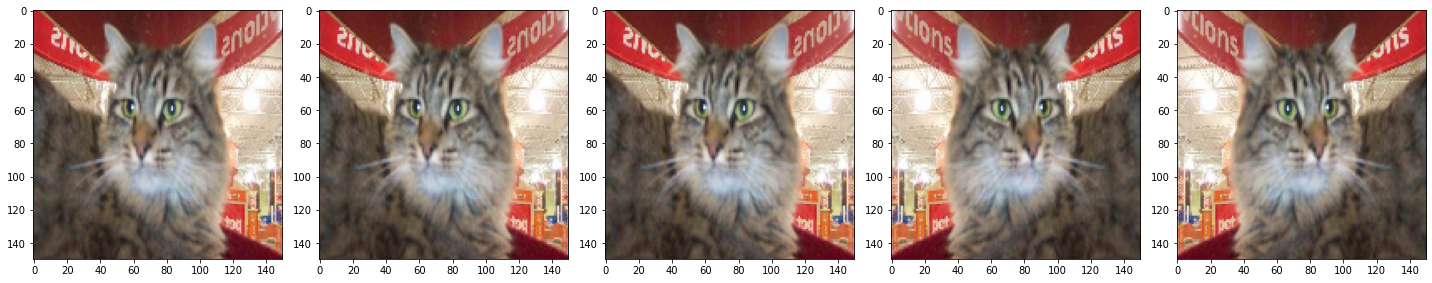

In [0]:
images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(images)

In [0]:
## Applying zoom

images_gen = ImageDataGenerator(rescale=1./255,zoom_range=0.5)

train_data_gen = images_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(SAMPLE_SIZE, SAMPLE_SIZE),
    directory=train_dir
)

Found 2000 images belonging to 2 classes.


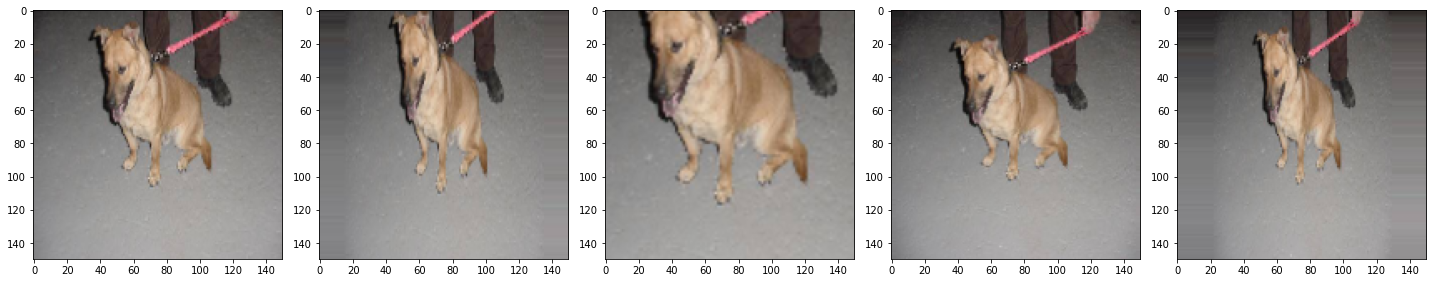

In [0]:
images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(images)

In [0]:
## rotation of the images
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(
    batch_size=BATCH_SIZE,
    target_size=(SAMPLE_SIZE, SAMPLE_SIZE),
    shuffle=True,
    directory=train_dir
)

Found 2000 images belonging to 2 classes.


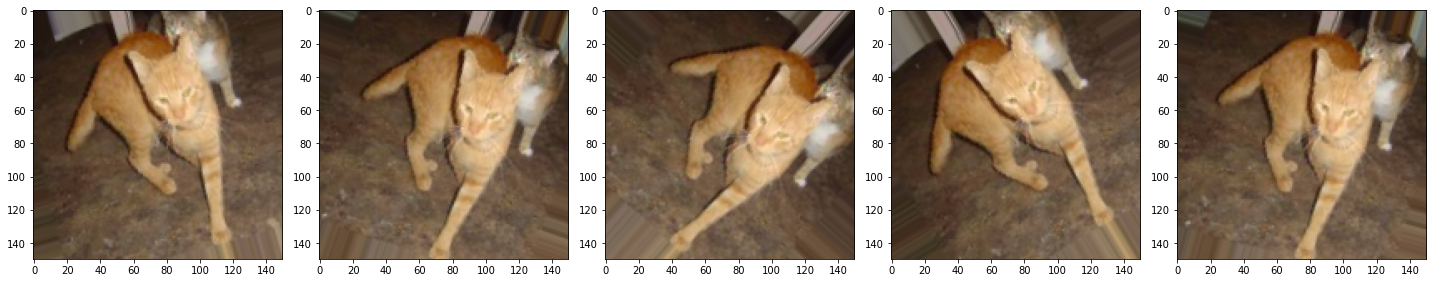

In [0]:
images = [train_data_gen[0][0][0] for i in range(5)]
plot_images(images)

In [0]:
## applying all the updation together

image_gen_train = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    rotation_range=40,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)

In [0]:
train_data_gen = image_gen_train.flow_from_directory(
    batch_size=BATCH_SIZE,
    target_size=(SAMPLE_SIZE,SAMPLE_SIZE),
    shuffle=True,
    directory =train_dir,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


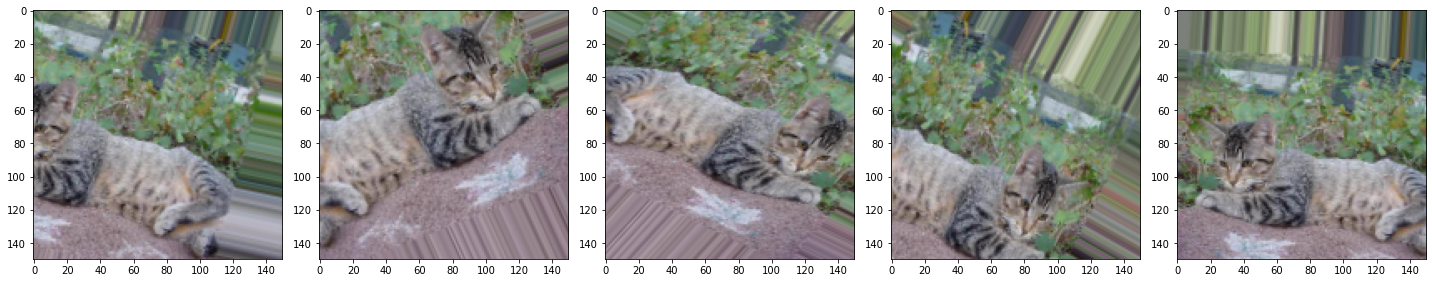

In [0]:

images = [ train_data_gen[0][0][0]  for i in range(5)]
plot_images(images)

We got artificial images with the slight modification in the single pic. In these ways, we can increase the data sets.


In [0]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(SAMPLE_SIZE, SAMPLE_SIZE),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


### Model Creation


We will use the sequential layers which contain four conv 2d + max pooling layers, Dense layer with 2 output(cats and dogs), Dense layers with 512 neuron with relu activation.


Also, we add droput in the model

we will repeat the whole model for 100 times by tuning the parameters and in order to reduce the overfitting, we will use dropout of 0.5 , which dedicates that 50% of the neurons will be neglected in the particular epochs.


In this way, we can train the model with the training independency.





### Train the model

In [0]:
epochs = 100




In [0]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Dropout(0.5),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(2)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Compile the model


In [0]:
model.compile(optimizer='adam',
             metrics=['accuracy'],
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

### Train the model

In [0]:
epochs = 100


history = model.fit_generator(
train_data_gen,
steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
epochs=epochs,
validation_data = val_data_gen,
validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))


)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 15s 759ms/step - loss: 0.7482 - accuracy: 0.5045 - val_loss: 0.6910 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 779ms/step - loss: 0.6931 - accuracy: 0.5055 - val_loss: 0.6913 - val_accuracy: 0.5020
Epoch 3/100
20/20 [==============================] - 16s 791ms/step - loss: 0.6925 - accuracy: 0.5030 - val_loss: 0.6862 - val_accuracy: 0.5820
Epoch 4/100
20/20 [==============================] - 15s 775ms/step - loss: 0.6922 - accuracy: 0.5095 - val_loss: 0.6891 - val_accuracy: 0.5870
Epoch 5/100
20/20 [==============================] - 16s 777ms/step - loss: 0.6876 - accuracy: 0.5660 - val_loss: 0.6822 - val_accuracy: 0.5410
Epoch 6/100
20/20 [==============================] - 16s 776ms/step - loss: 0.6800 - accuracy: 0.5765 - val_loss: 0.6735 - val_accuracy: 0.5480
Epoch 7/100
20/20 [==============================] - 16s 776

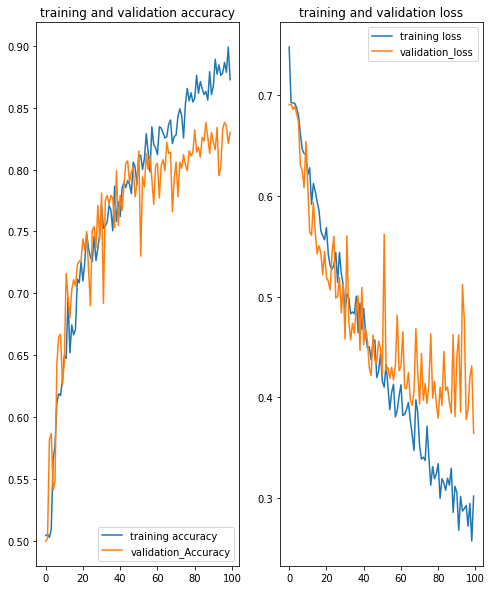

In [0]:
## lets visualize


acc = history.history['accuracy']
val_accu = history.history['val_accuracy']

loss= history.history['loss']
val_loss= history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,10))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='training accuracy')
plt.plot(epochs_range, val_accu, label='validation_Accuracy')

plt.legend(loc='lower right')

plt.title('training and validation accuracy')


plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='training loss')
plt.plot(epochs_range, val_loss, label='validation_loss')

plt.legend(loc='upper right')

plt.title('training and validation loss')



plt.show()


### FINISH



Overfitting problem resolved with the help of image augmentation